<a href="https://colab.research.google.com/github/Tom-Jung/ML_Colab/blob/main/26.GRU_predicting_Samsung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

In [5]:
url = 'https://raw.githubusercontent.com/neowizard2018/neowizard/master/TensorFlow2/005930.KS_3MA_5MA.csv'
raw_df = pd.read_csv(url)
raw_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4740.119629,74195000.0,NaN,NaN
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4328.947754,74680000.0,NaN,NaN
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4359.979492,54390000.0,4476.348958,NaN
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4297.916992,40305000.0,4328.948079,NaN
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4476.349121,46880000.0,4378.081868,4440.662598


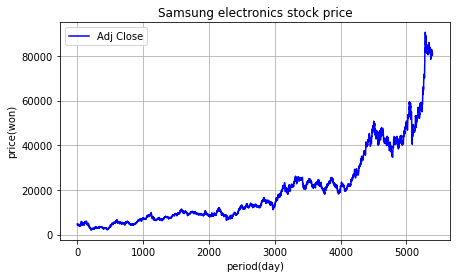

In [6]:
plt.figure(figsize=(7,4))

plt.title('Samsung electronics stock price')
plt.ylabel('price(won)')
plt.xlabel('period(day)')

plt.grid()
plt.plot(raw_df['Adj Close'], label = 'Adj Close', color='b')
plt.legend(loc='best')

plt.show()

In [7]:
raw_df.describe()

,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
count,5389.000000,5389.000000,5389.000000,5389.000000,5389.000000,5.389000e+03,5393.000000,5391.000000
mean,22801.887178,23043.991464,22559.285582,22801.909445,19920.044863,2.207838e+07,19934.224878,19925.585966
std,17736.201238,17906.827402,17572.109940,17733.296811,17322.636387,1.564053e+07,17313.297249,17292.697383
min,2540.000000,2760.000000,2420.000000,2730.000000,2117.926025,0.000000e+00,2164.473877,2179.989746
25%,9880.000000,9990.000000,9800.000000,9900.000000,7726.937988,1.185265e+07,7726.939453,7709.871631
50%,15760.000000,15940.000000,15560.000000,15800.000000,12808.596680,1.803935e+07,12802.806970,12809.314840
75%,29280.000000,29560.000000,29000.000000,29280.000000,24566.556640,2.771475e+07,24558.166020,24555.269140
max,90300.000000,96800.000000,89500.000000,91000.000000,90597.414060,1.642150e+08,90033.252600,89562.014060


In [8]:
raw_df.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
3MA          2
5MA          4
dtype: int64

In [9]:
raw_df.loc[raw_df['Open'].isna()]

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
1304,2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN,6989.931152,6910.412353
4513,2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN,49382.673830,49719.997070
4518,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN,49373.792970,49324.969730
4542,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,44927.763670,44190.302730
4755,2018-11-15,NaN,NaN,NaN,NaN,NaN,NaN,40569.835940,40775.886720
5000,2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN,49695.419920,49364.432620


In [10]:
raw_df['Volume'] = raw_df['Volume'].replace(0,np.nan)

for col in raw_df.columns:
  missing_rows = raw_df.loc[raw_df[col]==0].shape[0]
  print(col + ':' + str(missing_rows))                          

Date:0
Open:0
High:0
Low:0
Close:0
Adj Close:0
Volume:0
3MA:0
5MA:0


In [11]:
raw_df.isnull().sum()

Date           0
Open           6
High           6
Low            6
Close          6
Adj Close      6
Volume       122
3MA            2
5MA            4
dtype: int64

In [12]:
raw_df = raw_df.dropna()
raw_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          0
5MA          0
dtype: int64

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scale_cols = scale_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close',
              '3MA', '5MA', 'Volume']

scaled_df = scaler.fit_transform(raw_df[scale_cols])

print(type(scaled_df), '\n')

scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)

print(scaled_df)


<class 'numpy.ndarray'> 

          Open      High       Low     Close  Adj Close       3MA       5MA  \
0     0.034868  0.032008  0.036288  0.034440   0.026655  0.025192  0.025698   
1     0.037375  0.035517  0.038470  0.034440   0.026655  0.025634  0.025094   
2     0.034982  0.031689  0.036518  0.033873   0.026217  0.026163  0.025343   
3     0.034868  0.031689  0.036059  0.033760   0.026129  0.025987  0.025503   
4     0.036235  0.033177  0.037437  0.035120   0.027181  0.026163  0.026018   
...        ...       ...       ...       ...        ...       ...       ...   
5264  0.891750  0.830923  0.896647  0.881047   0.885878  0.895299  0.903144   
5265  0.892890  0.834113  0.897795  0.885578   0.890399  0.894920  0.900854   
5266  0.899727  0.841557  0.903537  0.895774   0.900571  0.897955  0.902457   
5267  0.895169  0.835177  0.898944  0.885578   0.890399  0.899472  0.902228   
5268  0.895169  0.833050  0.896647  0.881047   0.885878  0.897955  0.901083   

        Volume  
0     0.

In [14]:
feature_cols = ['3MA', '5MA', 'Adj Close']
label_cols =['Adj Close']

label_df = pd.DataFrame(scaled_df, columns=label_cols)
feature_df = pd.DataFrame(scaled_df, columns=feature_cols)

print(feature_df)
print(label_df)

label_np = label_df.to_numpy()
feature_np = feature_df.to_numpy()

           3MA       5MA  Adj Close
0     0.025192  0.025698   0.026655
1     0.025634  0.025094   0.026655
2     0.026163  0.025343   0.026217
3     0.025987  0.025503   0.026129
4     0.026163  0.026018   0.027181
...        ...       ...        ...
5264  0.895299  0.903144   0.885878
5265  0.894920  0.900854   0.890399
5266  0.897955  0.902457   0.900571
5267  0.899472  0.902228   0.890399
5268  0.897955  0.901083   0.885878

[5269 rows x 3 columns]
      Adj Close
0      0.026655
1      0.026655
2      0.026217
3      0.026129
4      0.027181
...         ...
5264   0.885878
5265   0.890399
5266   0.900571
5267   0.890399
5268   0.885878

[5269 rows x 1 columns]


In [15]:
# 입력 파라미터 feature, label => numpy type

def make_sequene_dataset(feature, label, window_size):

    feature_list = []      # 생성될 feature list
    label_list = []        # 생성될 label list

    for i in range(len(feature)-window_size):

        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])

    return np.array(feature_list), np.array(label_list)

In [16]:
window_size = 40

X, Y = make_sequene_dataset(feature_np, label_np, window_size)

print(X.shape, Y.shape)

(5229, 40, 3) (5229, 1)


In [17]:
# train, test 분리

#split = int(len(X)*0.95)
split = -200

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5029, 40, 3) (5029, 1)
(200, 40, 3) (200, 1)


In [18]:
model = Sequential()

model.add(GRU(256, activation='tanh', input_shape=x_train[0].shape))

model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               200448    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 200,705
Trainable params: 200,705
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=5)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=16, callbacks=[early_stop])

Epoch 1/100
315/315 [==============================] - 11s 17ms/step - loss: 4.9108e-04 - mae: 0.0091 - val_loss: 4.4357e-04 - val_mae: 0.0155
Epoch 2/100
315/315 [==============================] - 5s 15ms/step - loss: 6.0771e-05 - mae: 0.0052 - val_loss: 0.0011 - val_mae: 0.0277
Epoch 3/100
315/315 [==============================] - 5s 15ms/step - loss: 5.4248e-05 - mae: 0.0050 - val_loss: 3.2409e-04 - val_mae: 0.0134
Epoch 4/100
315/315 [==============================] - 5s 15ms/step - loss: 4.6447e-05 - mae: 0.0046 - val_loss: 5.1578e-04 - val_mae: 0.0174
Epoch 5/100
315/315 [==============================] - 5s 15ms/step - loss: 4.2881e-05 - mae: 0.0044 - val_loss: 2.6227e-04 - val_mae: 0.0121
Epoch 6/100
315/315 [==============================] - 5s 15ms/step - loss: 4.6126e-05 - mae: 0.0046 - val_loss: 3.1601e-04 - val_mae: 0.0127
Epoch 7/100
315/315 [==============================] - 5s 15ms/step - loss: 3.4818e-05 - mae: 0.0040 - val_loss: 2.6628e-04 - val_mae: 0.0129
Epoch 8/1

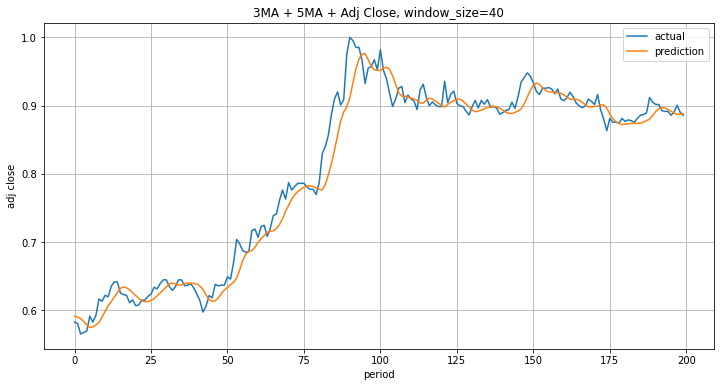

In [88]:
pred = model.predict(x_test)

plt.figure(figsize=(12, 6))
plt.title('3MA + 5MA + Adj Close, window_size=40')
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(y_test, label='actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [49]:
# 평균절대값백분율오차계산 (MAPE)

print( np.sum(abs(y_test-pred)/y_test) / len(x_test) )

0.01872856608150576


In [99]:
ttest=raw_df['Adj Close']
ttst=pd.DataFrame(ttest)
tttst=ttst[-200:]
print(pred.shape)
print(y_test.shape)
print(tttst.shape)

ppred=pred*tttst/(y_test)

print(ppred.shape)

(200, 1)
(200, 1)
(200, 1)
(200, 1)


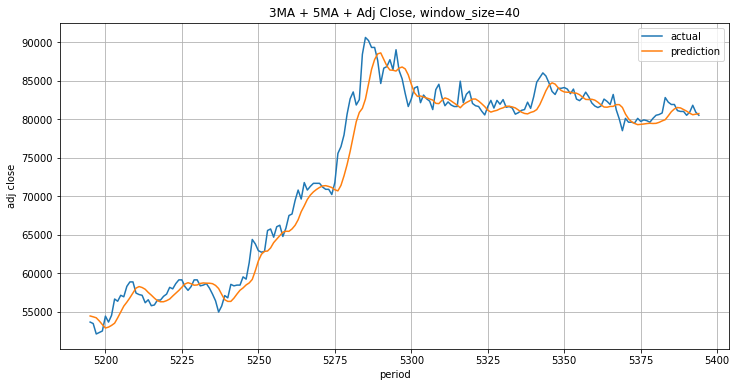

In [101]:
plt.figure(figsize=(12, 6))
plt.title('3MA + 5MA + Adj Close, window_size=40')
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(tttst, label='actual')
plt.plot(ppred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()